## FAKE NEWS CLASSIFIER 
### A Project By
### C107 Harshit Thakkar
### C112 Rishil Vaidya
### C126 Aman Roy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from num2words import num2words
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#loading the fake news classifier dataset
df = pd.read_csv('fake_news_train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#displaying the shape
df.shape

(20800, 5)

In [ ]:
#drop nan values 
df = df.dropna()

In [ ]:
#displaying the shape after dropping null values
df.shape

(18285, 5)

In [ ]:
#getting independent features
x = df.drop('label',axis = 1)

In [ ]:
#getting dependent features
y = df['label']

In [ ]:
#this is done to reorder the position of the rows 
df.reset_index(inplace = True)

### Data Preprocessing

In [ ]:
df_temp = df.copy()

In [ ]:
#importing the libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
print(list(df_temp['title'][:10]))

['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It', 'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart', 'Why the Truth Might Get You Fired', '15 Civilians Killed In Single US Airstrike Have Been Identified', 'Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery', 'Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart', 'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times', 'A Back-Channel Plan for Ukraine and Russia, Courtesy of Trump Associates - The New York Times', 'Obama’s Organizing for Action Partners with Soros-Linked ‘Indivisible’ to Disrupt Trump’s Agenda', 'BBC Comedy Sketch "Real Housewives of ISIS" Causes Outrage']


In [ ]:
# Vocabulary size
voc_size=5000

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
#removing punctuations
df_temp['title'] = df_temp['title'].apply(lambda string:re.sub(r'[^\w\s]','',string))

In [ ]:
#lowercasing the words
df_temp['title'] = df_temp['title'].str.lower()

In [ ]:
# Remove stopwords
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))
df_temp['title'] = df_temp['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [ ]:
#stemming
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df_temp['title'] = df_temp['title'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [ ]:
#converting into corpus of type list
textlist = list(df_temp['title'])
textlist

['house dem aide didnt even see comeys letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 '15 civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'benoît hamon win french socialist party presidential nomination new york time',
 'backchannel plan ukraine russia courtesy trump associate new york time',
 'obamas organizing action partner soroslinked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage',
 'russian researcher discover secret nazi military base treasure hunter arctic photo',
 'u official see link trump russia',
 'yes paid government troll social medium blog forum website',
 'major league soccer argentine find home success new york time',
 'well fargo chief abruptly step new york time',
 'anonymous

In [ ]:
#converting numbers to words
def convert_num_to_words(old_df):
    new_df = []
    for doc in old_df:
        x = doc.split() #split document into words
        new_doc_words = []
        for word in x:
            if word.isnumeric():
                y = num2words(int(word))
                new_doc_words.append(y)
            else:
                new_doc_words.append(word)
        new_df.append(" ".join(new_doc_words))
    return new_df
#new preprocessed dataset
new_df = convert_num_to_words(textlist)
for df in new_df:
    print(df,end = '\n')

house dem aide didnt even see comeys letter jason chaffetz tweeted
flynn hillary clinton big woman campus breitbart
truth might get fired
fifteen civilian killed single u airstrike identified
iranian woman jailed fictional unpublished story woman stoned death adultery
jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart
benoît hamon win french socialist party presidential nomination new york time
backchannel plan ukraine russia courtesy trump associate new york time
obamas organizing action partner soroslinked indivisible disrupt trump agenda
bbc comedy sketch real housewife isi cause outrage
russian researcher discover secret nazi military base treasure hunter arctic photo
u official see link trump russia
yes paid government troll social medium blog forum website
major league soccer argentine find home success new york time
well fargo chief abruptly step new york time
anonymous donor pay twenty-five million release everyone arrested 

In [ ]:
#integer encoding 
onehot_represent=[one_hot(words,voc_size)for words in new_df] 
onehot_represent

[[1597, 4385, 3489, 2440, 2793, 2478, 4395, 2693, 2728, 2978, 1117],
 [2772, 2398, 3809, 3622, 3045, 220, 1564],
 [3586, 4234, 819, 1740],
 [1672, 2217, 1707, 4224, 4854, 2427, 3328],
 [943, 3045, 3377, 3935, 4219, 3166, 3045, 114, 974, 2280],
 [1966,
  2810,
  2271,
  1958,
  1754,
  2989,
  4245,
  4771,
  2223,
  2129,
  3536,
  4915,
  4931,
  4663,
  1564],
 [4508, 895, 4305, 4881, 3811, 1747, 757, 482, 2992, 116, 744],
 [1904, 4243, 4586, 2882, 2232, 2989, 2990, 2992, 116, 744],
 [1176, 326, 3803, 1938, 1921, 1825, 4089, 2989, 2306],
 [3508, 1790, 2819, 1127, 4529, 4061, 736, 3738],
 [3039, 1116, 4298, 4111, 1514, 3427, 302, 2839, 3240, 3953, 2835],
 [4854, 4289, 2478, 94, 2989, 2882],
 [4703, 1382, 4024, 3065, 467, 4898, 2097, 702, 2141],
 [4586, 1019, 3420, 4599, 3775, 1621, 678, 2992, 116, 744],
 [4672, 1833, 2742, 2959, 2559, 2992, 116, 744],
 [999, 1902, 153, 4613, 735, 1696, 1578, 2611, 4301, 1232, 3326, 189],
 [1903, 965, 2398],
 [1945, 1887, 3772, 3768, 2989, 4283, 1597, 

### Embedding Representation

In [ ]:
#fetching the max length of the document
max_length = max([len(doc) for doc in onehot_represent])
max_length

46

In [ ]:
#using padding to maintain the length of same document while calculating the embedding vector for each word.
embedded_docs=pad_sequences(onehot_represent,padding='pre',maxlen=max_length)
print(embedded_docs)

[[   0    0    0 ... 2728 2978 1117]
 [   0    0    0 ... 3045  220 1564]
 [   0    0    0 ... 4234  819 1740]
 ...
 [   0    0    0 ... 2992  116  744]
 [   0    0    0 ... 3807 3737  488]
 [   0    0    0 ... 3491  287 4681]]


In [ ]:
#mapping documents to encodings

In [ ]:
#Creating model
with tf.device('cpu:0'):
    embedding_vector_features=100
    model_embedding=Sequential()
    model_embedding.add(Embedding(voc_size,embedding_vector_features,input_length=max_length))
    model_embedding.add(LSTM(50))
    model_embedding.add(Dense(1,activation='sigmoid'))
    model_embedding.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    print(model_embedding.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 46, 100)           500000    
                                                                 
 lstm (LSTM)                 (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 530,251
Trainable params: 530,251
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#converting arrays into numpy arrays
x_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
#splitting into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.3, random_state=42)

In [ ]:
#training the model
with tf.device('cpu:0'):
    history = model_embedding.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
200/200 [==============================] - 14s 59ms/step - loss: 0.2979 - accuracy: 0.8580 - val_loss: 0.2046 - val_accuracy: 0.9147
Epoch 2/5
200/200 [==============================] - 11s 57ms/step - loss: 0.1302 - accuracy: 0.9506 - val_loss: 0.2148 - val_accuracy: 0.9147
Epoch 3/5
200/200 [==============================] - 11s 57ms/step - loss: 0.0818 - accuracy: 0.9707 - val_loss: 0.2460 - val_accuracy: 0.9103
Epoch 4/5
200/200 [==============================] - 11s 53ms/step - loss: 0.0495 - accuracy: 0.9854 - val_loss: 0.3089 - val_accuracy: 0.9118
Epoch 5/5
200/200 [==============================] - 12s 58ms/step - loss: 0.0274 - accuracy: 0.9927 - val_loss: 0.3370 - val_accuracy: 0.9094


In [ ]:
#evaluation on test dataset
results_test = model_embedding.evaluate(X_test,y_test,verbose = 0)

In [ ]:
print("So loss on evaluation set is :",results_test[0])
print("So accuracy on evaluation set is :",results_test[1])

So loss on evaluation set is : 0.33697155117988586
So accuracy on evaluation set is : 0.9094057679176331


In [ ]:
#defining function for displaying training loss and validation loss
def plot_performance_graph_with_loss(history):
    loss_values = history.history['loss']
    val_loss_values = history.history['val_loss']
    plt.plot(loss_values, label='Training loss')
    plt.plot(val_loss_values,label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['training','validation'],loc = 'upper left')
    plt.show()


In [ ]:
#defining function for displaying training loss and validation accuracy
def plot_performance_graph_with_accuracy(history):
    acc_values = history.history['accuracy']
    val_acc_values = history.history['val_accuracy']
    plt.plot(acc_values, label='Training Accuracy')
    plt.plot(val_acc_values,label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['training','validation'],loc = 'lower right')
    plt.show()


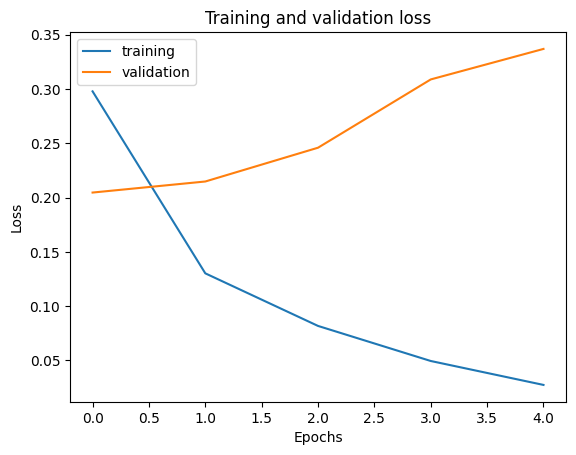

In [ ]:
#plotting the training and validation curve - loss
plot_performance_graph_with_loss(history)

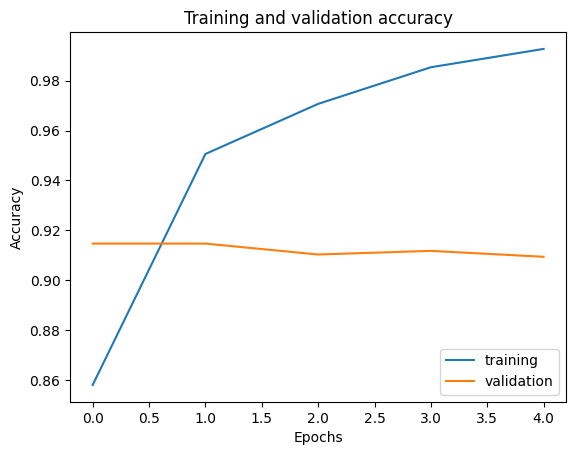

In [ ]:
#plotting the training and validation curve - loss
plot_performance_graph_with_accuracy(history)

## Predictions obtained from the model (Before Regularization)

In [ ]:
y_pred = model_embedding.predict(X_test)
y_pred = np.where(y_pred > 0.5,1,0)

172/172 [==============================] - 2s 5ms/step


In [ ]:
confusion_matrix(y_test,y_pred)

array([[2770,  337],
       [ 160, 2219]], dtype=int64)

In [ ]:
accuracy_score(y_test,y_pred)

0.9094057601166606

### Regularizing Technique Used - Adding Dropout 

#### We have used multiple regularization technique and came up with the best possible solution.So,I conclude that dropout technique is used to reduce the chances of overfitting of the model.

In [ ]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=max_length,embeddings_regularizer=tf.keras.regularizers.l2(0.001)  
))
#regularization added to lstm model to prevent it from overfitting
model.add(LSTM(50,dropout = 0.5))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#fetching the weights of the embedding layer
model.get_layer('embedding_1').get_weights()[0]

array([[-0.00796975,  0.04161863, -0.03649931, ..., -0.02509901,
         0.02833359, -0.03174777],
       [-0.03537994,  0.02458333, -0.02371809, ...,  0.02839455,
        -0.01512169,  0.00534359],
       [ 0.00486969,  0.00086977,  0.04840395, ...,  0.00660714,
         0.00744972, -0.00469379],
       ...,
       [ 0.0409603 , -0.00859974, -0.00454377, ...,  0.00530571,
        -0.02740377, -0.0405621 ],
       [ 0.04178497, -0.01092571, -0.02276893, ..., -0.03019384,
        -0.01756257,  0.03964912],
       [ 0.01317734, -0.0360508 ,  0.01365823, ..., -0.04107317,
        -0.03289429, -0.04164834]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 46, 100)           500000    
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 530,251
Trainable params: 530,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training the model
with tf.device('cpu:0'):
    history2 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
200/200 [==============================] - 14s 57ms/step - loss: 0.3822 - accuracy: 0.8499 - val_loss: 0.2529 - val_accuracy: 0.9131
Epoch 2/5
200/200 [==============================] - 14s 68ms/step - loss: 0.2212 - accuracy: 0.9325 - val_loss: 0.2652 - val_accuracy: 0.9198
Epoch 3/5
200/200 [==============================] - 11s 56ms/step - loss: 0.2069 - accuracy: 0.9452 - val_loss: 0.2845 - val_accuracy: 0.9123
Epoch 4/5
200/200 [==============================] - 13s 64ms/step - loss: 0.1986 - accuracy: 0.9527 - val_loss: 0.2851 - val_accuracy: 0.9138
Epoch 5/5
200/200 [==============================] - 13s 65ms/step - loss: 0.1866 - accuracy: 0.9611 - val_loss: 0.2941 - val_accuracy: 0.9189


In [ ]:
#evaluation on test dataset
results_test = model.evaluate(X_test,y_test,verbose = 0)

In [ ]:
print("So loss on evaluation set is :",results_test[0])
print("So accuracy on evaluation set is :",results_test[1])

So loss on evaluation set is : 0.29412269592285156
So accuracy on evaluation set is : 0.9188844561576843


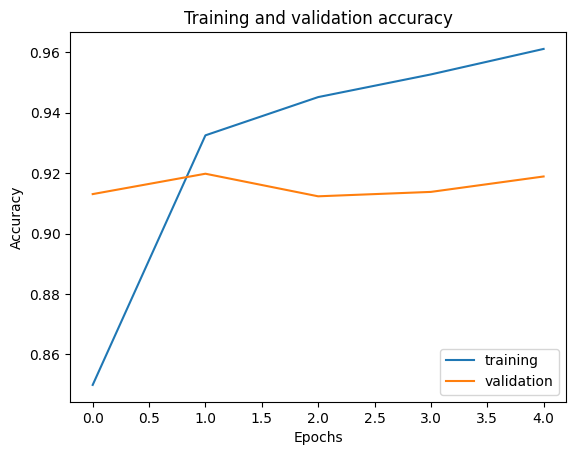

In [ ]:
#plotting the training and validation curve - accuracy
plot_performance_graph_with_accuracy(history2)

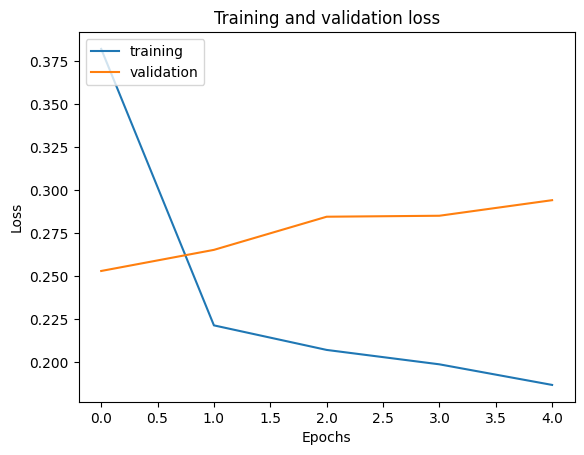

In [ ]:
#plotting the training and validation curve - loss
plot_performance_graph_with_loss(history2)

### Performance metrics And Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
X_test

array([[   0,    0,    0, ..., 4013, 2540, 4401],
       [   0,    0,    0, ..., 2992,  116,  744],
       [   0,    0,    0, ..., 2992,  116,  744],
       ...,
       [   0,    0,    0, ..., 3787, 3809, 2989],
       [   0,    0,    0, ...,  125, 2383, 1564],
       [   0,    0,    0, ..., 3188,  498, 4563]])

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5,1,0)

172/172 [==============================] - 1s 5ms/step


In [ ]:
y_pred

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
confusion_matrix(y_test,y_pred)

array([[2817,  290],
       [ 155, 2224]], dtype=int64)

In [ ]:
accuracy_score(y_test,y_pred)

0.9188844331024426

# Single prediction

In [ ]:
print(X_test[0].reshape(-1,46))

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0 3039  693 1190
  2761 4013 2540 4401]]


In [ ]:
y_single=model.predict(np.array(X_test[0]).reshape(-1,46))

1/1 [==============================] - 0s 29ms/step


In [ ]:
y_single

array([[0.98944587]], dtype=float32)

In [ ]:
np.where(y_single > 0.5,1,0)

array([[1]])